In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
chunk1_df = pd.read_json('/Users/rjpathak/Downloads/compoundV2_transactions_ethereum_chunk_0.json')

In [3]:
chunk2_df = pd.read_json('/Users/rjpathak/Downloads/compoundV2_transactions_ethereum_chunk_1.json')

In [4]:
merge_df = pd.concat([chunk1_df, chunk2_df], ignore_index=True)

In [5]:
merge_df

,deposits,withdraws,borrows,repays,liquidates
0,{'account': {'id': '0x502cb8985b2c92a8d4bf309c...,{'account': {'id': '0xa9ee140bfe20a7a5f9e170c6...,{'account': {'id': '0x502cb8985b2c92a8d4bf309c...,{'account': {'id': '0xb3fbe25be2e8ca097e9ac924...,"{'amount': '2057944', 'amountUSD': '0.06825721..."
1,{'account': {'id': '0xc8355d0e2c265b2fe495ebbc...,{'account': {'id': '0xb3fbe25be2e8ca097e9ac924...,{'account': {'id': '0x502cb8985b2c92a8d4bf309c...,{'account': {'id': '0xb3fbe25be2e8ca097e9ac924...,"{'amount': '82438541', 'amountUSD': '4.1005124..."
2,{'account': {'id': '0x502cb8985b2c92a8d4bf309c...,{'account': {'id': '0xb3fbe25be2e8ca097e9ac924...,{'account': {'id': '0x502cb8985b2c92a8d4bf309c...,{'account': {'id': '0x4654f56a64301b9b582f843f...,"{'amount': '7075691374', 'amountUSD': '1.42247..."
3,{'account': {'id': '0x502cb8985b2c92a8d4bf309c...,{'account': {'id': '0x4da2e85d64bece663ccab06e...,{'account': {'id': '0xa7ff0d561cd15ed525e31bbe...,{'account': {'id': '0x6361c73de2e382899c040923...,"{'amount': '594357611103', 'amountUSD': '119.4..."
4,{'account': {'id': '0x502cb8985b2c92a8d4bf309c...,{'account': {'id': '0x502cb8985b2c92a8d4bf309c...,{'account': {'id': '0xbd9ed130a53cfafcf81502e4...,{'account': {'id': '0x6361c73de2e382899c040923...,"{'amount': '517842048810', 'amountUSD': '103.4..."
...,...,...,...,...,...
19995,{'account': {'id': '0xffc7ec34cd530cb5745cb06a...,{'account': {'id': '0x724aece161d7ad981b34f3db...,{'account': {'id': '0x42de4c61e4a02d5248befe39...,{'account': {'id': '0xdf7db5a323f7f9f520b699f2...,"{'amount': '90897033', 'amountUSD': '40.626872..."
19996,{'account': {'id': '0x7b47cdd24695e6021776d614...,{'account': {'id': '0x724aece161d7ad981b34f3db...,{'account': {'id': '0x586e32930ac05127de429bd5...,{'account': {'id': '0x0aa05126f46862cb8cc097a4...,"{'amount': '106717936', 'amountUSD': '47.86835..."
19997,{'account': {'id': '0x9c8bcf50c240d04cf4123082...,{'account': {'id': '0x38277d8eeae7e5cf88126fa0...,{'account': {'id': '0xbbe3ac5059d5512f6f2f5593...,{'account': {'id': '0x0aa05126f46862cb8cc097a4...,"{'amount': '56023419', 'amountUSD': '25.609580..."
19998,{'account': {'id': '0x946509c95f6b0675dc6654b1...,{'account': {'id': '0xf3d02e8b73105838e00617ef...,{'account': {'id': '0xc60c784a4556126720b113e1...,{'account': {'id': '0x39b8e8bc30bb95bdf45a623d...,"{'amount': '30910084', 'amountUSD': '14.186940..."


In [6]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   deposits    20000 non-null  object
 1   withdraws   20000 non-null  object
 2   borrows     20000 non-null  object
 3   repays      20000 non-null  object
 4   liquidates  20000 non-null  object
dtypes: object(5)
memory usage: 781.4+ KB


In [7]:
def extract_events(merge_df, column_name, action_name, account_key='account.id'):
    temp = pd.json_normalize(merge_df[column_name])
    temp['action'] = action_name
    if account_key in temp.columns:
        temp = temp.rename(columns={account_key: 'account_id'})
    return temp

deposit_df = extract_events(merge_df, 'deposits', 'deposit')
withdraw_df = extract_events(merge_df, 'withdraws', 'withdraw')
borrow_df = extract_events(merge_df, 'borrows', 'borrow')
repay_df = extract_events(merge_df, 'repays', 'repay')
liquidate_df = extract_events(merge_df, 'liquidates', 'liquidate', account_key='liquidator.id')

events_df = pd.concat([
    deposit_df, withdraw_df, borrow_df, repay_df, liquidate_df
], ignore_index=True)

In [8]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   amount         100000 non-null  object
 1   amountUSD      100000 non-null  object
 2   hash           100000 non-null  object
 3   id             100000 non-null  object
 4   timestamp      100000 non-null  object
 5   account_id     100000 non-null  object
 6   asset.id       100000 non-null  object
 7   asset.symbol   100000 non-null  object
 8   action         100000 non-null  object
 9   liquidatee.id  20000 non-null   object
dtypes: object(10)
memory usage: 7.6+ MB


In [9]:
events_df.head(5)

,amount,amountUSD,hash,id,timestamp,account_id,asset.id,asset.symbol,action,liquidatee.id
0,10000000000000000,1.78010000000000014408,0xa1b27194b198762eaa631564fea76008b363c157a1cc...,0xa1b27194b198762eaa631564fea76008b363c157a1cc...,1557193282,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,deposit,NaN
1,80000000000000000,14.24080000000000115264,0x1d2000c49507d94ef42ec995e1ea59b41e61bf0c63d4...,0x1d2000c49507d94ef42ec995e1ea59b41e61bf0c63d4...,1557193511,0xc8355d0e2c265b2fe495ebbc0fc9ad992b40dc8f,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,deposit,NaN
2,4582920657824222640301,1562.320140205329756474017145956277,0x4c3b59d70f6205a16f4d6f4c960d22ad332dd740720a...,0x4c3b59d70f6205a16f4d6f4c960d22ad332dd740720a...,1557195125,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,0x0d8775f648430679a709e98d2b0cb6250d2887ef,BAT,deposit,NaN
3,4013962940167102266494,4013.962940167102266494,0xe8b31ff5cf7252a1a496dadfeccef667577d88cdf2c4...,0xe8b31ff5cf7252a1a496dadfeccef667577d88cdf2c4...,1557195125,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,deposit,NaN
4,9990000000000000000,1775.4727500000001641357,0x0eda39d1cb1844e8c2f659219f5a414c0b8261e6dee5...,0x0eda39d1cb1844e8c2f659219f5a414c0b8261e6dee5...,1557196912,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,deposit,NaN


In [10]:
events_df = events_df.drop(['amount', 'hash', 'id', 'asset.id', 'liquidatee.id'], axis = 1)

In [11]:
events_df['amountUSD'] = events_df['amountUSD'].astype(float).round(2)

In [12]:
events_df.dtypes

amountUSD       float64
timestamp        object
account_id       object
asset.symbol     object
action           object
dtype: object

In [13]:
events_df['timestamp'] = pd.to_numeric(events_df['timestamp'], errors = 'coerce')

In [14]:
deposits = events_df[events_df['action'] == 'deposit'].groupby('account_id')['amountUSD'].sum().rename('total_deposits_usd')
borrows = events_df[events_df['action'] == 'borrow'].groupby('account_id')['amountUSD'].sum().rename('total_borrows_usd')
repays = events_df[events_df['action'] == 'repay'].groupby('account_id')['amountUSD'].sum().rename('total_repays_usd')
liquidations = events_df[events_df['action'] == 'liquidate'].groupby('account_id').size().rename('num_liquidations')
first_activity = events_df.groupby('account_id')['timestamp'].min().rename('first_activity_time')
last_activity = events_df.groupby('account_id')['timestamp'].max().rename('last_activity_time')


credit_features = pd.concat([
    deposits,
    borrows,
    repays,
    liquidations,
    first_activity,
    last_activity
], axis=1).fillna(0)

In [15]:
credit_features

,total_deposits_usd,total_borrows_usd,total_repays_usd,num_liquidations,first_activity_time,last_activity_time
account_id,,,,,,
0x000000aaee6a496aaf7b7452518781786313400f,691534.91,2694434.70,1549312.93,22.0,1562064835,1577129672
0x00000a6bbb35ea3f6f8dbc94801738f490c30a8d,6.07,0.00,0.00,0.0,1559606215,1562659239
0x0006e4548aed4502ec8c844567840ce6ef1013f5,236378.57,363617.29,627331.00,129.0,1557919931,1598124196
0x000be263b3ceb55d22ed9b40d7619f62c4862c80,81612.53,27007.49,13209.40,0.0,1558924865,1568352209
0x00120ec799017bbab1049174ac3cd706260effc4,502.96,0.00,0.00,0.0,1562615197,1566286602
...,...,...,...,...,...,...
0xff659461bb2f7353fdf9d93d452d607a015fc4d5,0.00,0.00,0.00,0.0,1565871752,1565871752
0xff6ab1ce2f51767887b856900182a9c5beff3b32,0.00,0.00,0.00,0.0,1567105253,1567105253
0xffbae08270c6026ecde4f7ac821986242a371614,0.00,0.00,0.00,0.0,1565392376,1565392376


In [16]:
credit_features['active_duration_days'] = (credit_features['last_activity_time'] - credit_features['first_activity_time'])// (60*60*24)
credit_features['borrow_to_repay_ratio'] = (
    (credit_features['total_borrows_usd'] // credit_features['total_repays_usd'])
).replace([float('inf'), -float('inf')], 0).fillna(0)
credit_features = credit_features.reset_index()

In [17]:
credit_features

,account_id,total_deposits_usd,total_borrows_usd,total_repays_usd,num_liquidations,first_activity_time,last_activity_time,active_duration_days,borrow_to_repay_ratio
0,0x000000aaee6a496aaf7b7452518781786313400f,691534.91,2694434.70,1549312.93,22.0,1562064835,1577129672,174,1.0
1,0x00000a6bbb35ea3f6f8dbc94801738f490c30a8d,6.07,0.00,0.00,0.0,1559606215,1562659239,35,0.0
2,0x0006e4548aed4502ec8c844567840ce6ef1013f5,236378.57,363617.29,627331.00,129.0,1557919931,1598124196,465,0.0
3,0x000be263b3ceb55d22ed9b40d7619f62c4862c80,81612.53,27007.49,13209.40,0.0,1558924865,1568352209,109,2.0
4,0x00120ec799017bbab1049174ac3cd706260effc4,502.96,0.00,0.00,0.0,1562615197,1566286602,42,0.0
...,...,...,...,...,...,...,...,...,...
9665,0xff659461bb2f7353fdf9d93d452d607a015fc4d5,0.00,0.00,0.00,0.0,1565871752,1565871752,0,0.0
9666,0xff6ab1ce2f51767887b856900182a9c5beff3b32,0.00,0.00,0.00,0.0,1567105253,1567105253,0,0.0
9667,0xffbae08270c6026ecde4f7ac821986242a371614,0.00,0.00,0.00,0.0,1565392376,1565392376,0,0.0
9668,0xffc9d2d7d38860ec25f543266360130e90c16ec9,0.00,0.00,0.00,0.0,1564875513,1564875513,0,0.0


In [18]:
mis_per = ((credit_features == 0).sum()/len(credit_features))*100
mis_per

account_id                0.000000
total_deposits_usd       45.201655
total_borrows_usd        67.859359
total_repays_usd         76.639090
num_liquidations         93.609100
first_activity_time       0.000000
last_activity_time        0.000000
active_duration_days     44.932782
borrow_to_repay_ratio    86.018614
dtype: float64

In [19]:
credit_features = credit_features[
    (credit_features['total_deposits_usd'] > 0) &
    (credit_features['total_borrows_usd'] > 0) &
    (credit_features['total_repays_usd'] > 0) &
    (~credit_features['borrow_to_repay_ratio'].isna()) &
    (~credit_features['borrow_to_repay_ratio'].isin([float('inf')]))
]

In [20]:
credit_features

,account_id,total_deposits_usd,total_borrows_usd,total_repays_usd,num_liquidations,first_activity_time,last_activity_time,active_duration_days,borrow_to_repay_ratio
0,0x000000aaee6a496aaf7b7452518781786313400f,691534.91,2694434.70,1549312.93,22.0,1562064835,1577129672,174,1.0
2,0x0006e4548aed4502ec8c844567840ce6ef1013f5,236378.57,363617.29,627331.00,129.0,1557919931,1598124196,465,0.0
3,0x000be263b3ceb55d22ed9b40d7619f62c4862c80,81612.53,27007.49,13209.40,0.0,1558924865,1568352209,109,2.0
5,0x0029ab135b5be72168bf80f140d60a9264dbd0c5,2217.38,1190.78,452.83,0.0,1558378885,1576245347,206,2.0
13,0x003c52a71c887461087154eccced08cb1c5384a5,47089.41,27200.24,20649.49,0.0,1559043343,1578995503,230,1.0
...,...,...,...,...,...,...,...,...,...
5295,0xff19ad332cc5bb32703a3058c6f93ce177cfbb08,1726.88,1656.37,1675.75,0.0,1558619558,1574017493,178,0.0
5296,0xff2bbb591d9ee23259e3e95d931ee59a61b2212f,81.59,426.27,336.55,0.0,1564113732,1577546906,155,1.0
5302,0xff5269e8ae6a9f2ff2a93c770fd35f8ce71712f8,90830.58,23979.34,25343.42,0.0,1558841562,1578541654,228,0.0
5310,0xffbc36636cffeee51593f6f8048f618138b5b793,1578.73,1716.40,198.25,0.0,1560604366,1575671600,174,8.0


In [21]:
mis_per = ((credit_features == 0).sum()/len(credit_features))*100
mis_per

account_id                0.000000
total_deposits_usd        0.000000
total_borrows_usd         0.000000
total_repays_usd          0.000000
num_liquidations         97.417355
first_activity_time       0.000000
last_activity_time        0.000000
active_duration_days      7.231405
borrow_to_repay_ratio    37.190083
dtype: float64

In [22]:
credit_features.describe()

,total_deposits_usd,total_borrows_usd,total_repays_usd,num_liquidations,first_activity_time,last_activity_time,active_duration_days,borrow_to_repay_ratio
count,9.680000e+02,9.680000e+02,9.680000e+02,968.000000,9.680000e+02,9.680000e+02,968.000000,968.000000
mean,1.070533e+05,1.286966e+05,9.973056e+04,0.760331,1.561453e+09,1.569938e+09,97.720041,13.074380
std,8.194643e+05,1.020397e+06,8.100398e+05,9.349383,1.974379e+06,6.758061e+06,81.634410,162.375892
min,1.000000e-02,1.000000e-02,1.000000e-02,0.000000,1.557193e+09,1.557430e+09,0.000000,0.000000
25%,2.413850e+02,1.611400e+02,1.011000e+02,0.000000,1.559479e+09,1.564310e+09,23.000000,0.000000
50%,2.492140e+03,2.200000e+03,1.499665e+03,0.000000,1.561754e+09,1.568130e+09,81.500000,1.000000
75%,1.951534e+04,1.823478e+04,1.053072e+04,0.000000,1.563193e+09,1.575636e+09,164.250000,1.000000
max,2.131455e+07,1.920054e+07,1.981826e+07,226.000000,1.564350e+09,1.606455e+09,500.000000,3474.000000


In [23]:

credit_features['first_activity_dt'] = pd.to_datetime(credit_features['first_activity_time'], unit='s')
credit_features['last_activity_dt'] = pd.to_datetime(credit_features['last_activity_time'], unit='s')

current_date = pd.to_datetime('now')

credit_features['days_since_last_activity'] = (current_date - credit_features['last_activity_dt']).dt.days

credit_features['account_age_days'] = (current_date - credit_features['first_activity_dt']).dt.days


In [24]:
credit_features

,account_id,total_deposits_usd,total_borrows_usd,total_repays_usd,num_liquidations,first_activity_time,last_activity_time,active_duration_days,borrow_to_repay_ratio,first_activity_dt,last_activity_dt,days_since_last_activity,account_age_days
0,0x000000aaee6a496aaf7b7452518781786313400f,691534.91,2694434.70,1549312.93,22.0,1562064835,1577129672,174,1.0,2019-07-02 10:53:55,2019-12-23 19:34:32,1961,2135
2,0x0006e4548aed4502ec8c844567840ce6ef1013f5,236378.57,363617.29,627331.00,129.0,1557919931,1598124196,465,0.0,2019-05-15 11:32:11,2020-08-22 19:23:16,1718,2183
3,0x000be263b3ceb55d22ed9b40d7619f62c4862c80,81612.53,27007.49,13209.40,0.0,1558924865,1568352209,109,2.0,2019-05-27 02:41:05,2019-09-13 05:23:29,2062,2171
5,0x0029ab135b5be72168bf80f140d60a9264dbd0c5,2217.38,1190.78,452.83,0.0,1558378885,1576245347,206,2.0,2019-05-20 19:01:25,2019-12-13 13:55:47,1971,2178
13,0x003c52a71c887461087154eccced08cb1c5384a5,47089.41,27200.24,20649.49,0.0,1559043343,1578995503,230,1.0,2019-05-28 11:35:43,2020-01-14 09:51:43,1939,2170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5295,0xff19ad332cc5bb32703a3058c6f93ce177cfbb08,1726.88,1656.37,1675.75,0.0,1558619558,1574017493,178,0.0,2019-05-23 13:52:38,2019-11-17 19:04:53,1997,2175
5296,0xff2bbb591d9ee23259e3e95d931ee59a61b2212f,81.59,426.27,336.55,0.0,1564113732,1577546906,155,1.0,2019-07-26 04:02:12,2019-12-28 15:28:26,1956,2111
5302,0xff5269e8ae6a9f2ff2a93c770fd35f8ce71712f8,90830.58,23979.34,25343.42,0.0,1558841562,1578541654,228,0.0,2019-05-26 03:32:42,2020-01-09 03:47:34,1944,2172
5310,0xffbc36636cffeee51593f6f8048f618138b5b793,1578.73,1716.40,198.25,0.0,1560604366,1575671600,174,8.0,2019-06-15 13:12:46,2019-12-06 22:33:20,1978,2152


In [25]:
credit_features = credit_features.drop(['first_activity_time', 'last_activity_time', 'first_activity_dt', 'last_activity_dt'], axis =1)

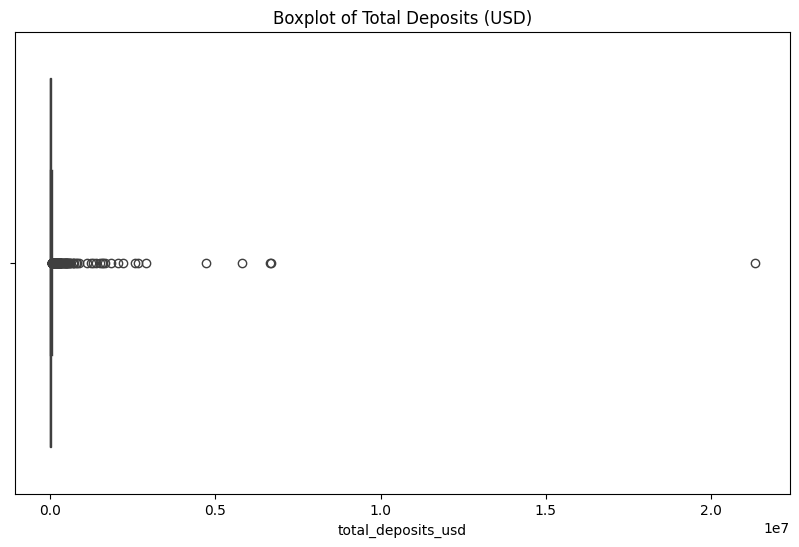

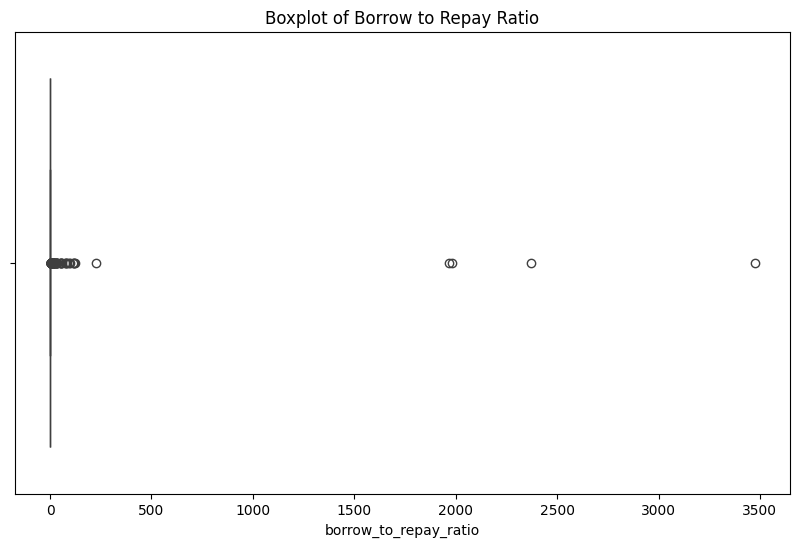

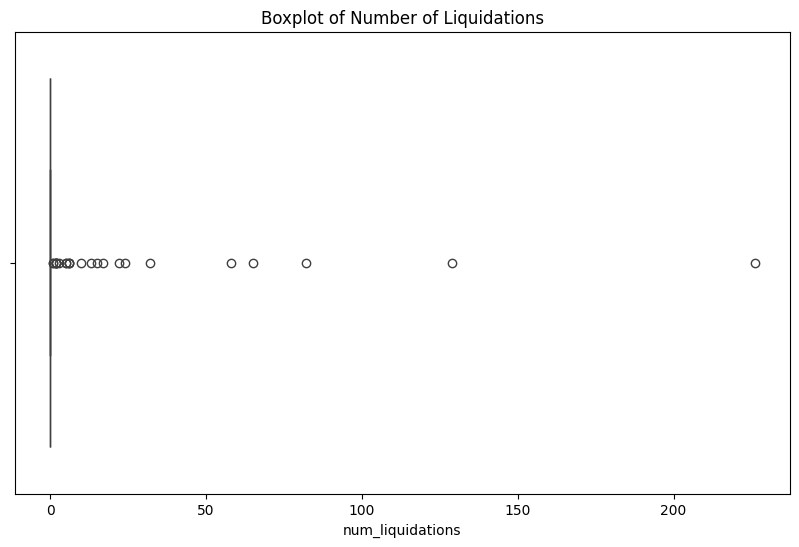

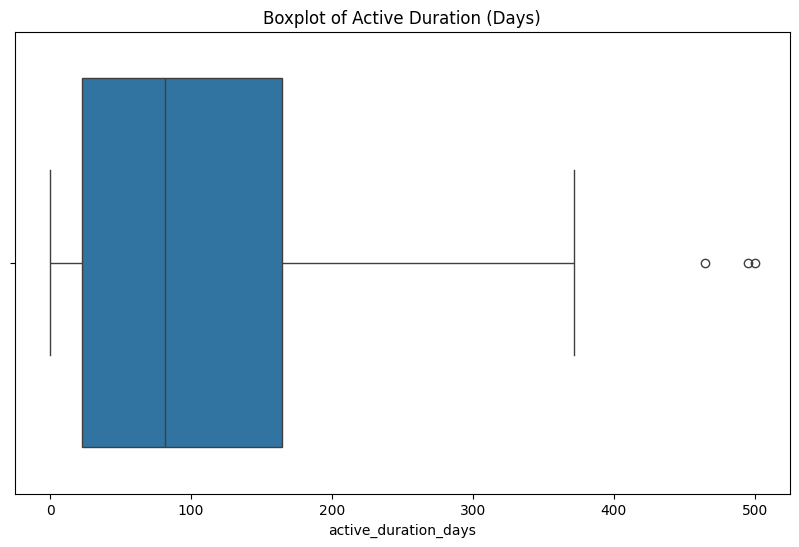

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit_features['total_deposits_usd'])
plt.title('Boxplot of Total Deposits (USD)')
plt.show()

# Box plot for borrow-to-repay ratio
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit_features['borrow_to_repay_ratio'])
plt.title('Boxplot of Borrow to Repay Ratio')
plt.show()

# Box plot for num_liquidations
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit_features['num_liquidations'])
plt.title('Boxplot of Number of Liquidations')
plt.show()

# Box plot for active duration days
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit_features['active_duration_days'])
plt.title('Boxplot of Active Duration (Days)')
plt.show()

In [27]:
credit_features.describe()

,total_deposits_usd,total_borrows_usd,total_repays_usd,num_liquidations,active_duration_days,borrow_to_repay_ratio,days_since_last_activity,account_age_days
count,9.680000e+02,9.680000e+02,9.680000e+02,968.000000,968.000000,968.000000,968.000000,968.000000
mean,1.070533e+05,1.286966e+05,9.973056e+04,0.760331,97.720041,13.074380,2043.981405,2142.172521
std,8.194643e+05,1.020397e+06,8.100398e+05,9.349383,81.634410,162.375892,78.212764,22.856329
min,1.000000e-02,1.000000e-02,1.000000e-02,0.000000,0.000000,0.000000,1621.000000,2109.000000
25%,2.413850e+02,1.611400e+02,1.011000e+02,0.000000,23.000000,0.000000,1978.000000,2122.000000
50%,2.492140e+03,2.200000e+03,1.499665e+03,0.000000,81.500000,1.000000,2065.000000,2139.000000
75%,1.951534e+04,1.823478e+04,1.053072e+04,0.000000,164.250000,1.000000,2109.000000,2165.000000
max,2.131455e+07,1.920054e+07,1.981826e+07,226.000000,500.000000,3474.000000,2189.000000,2191.000000


In [28]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.90)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in ['total_deposits_usd', 'total_borrows_usd', 'total_repays_usd', 'active_duration_days', 'borrow_to_repay_ratio']:
    credit_features = remove_outliers_iqr(credit_features, col)

In [29]:
credit_features.shape

(794, 9)

In [30]:
credit_features['total_deposits_usd'].median()

1650.0

In [31]:
def calculate_credit_score(row):
    score = 0
    if row['total_deposits_usd'] > 9458:
        score += 20
    elif row['total_deposits_usd'] > 156:
        score += 10
    else:
        score += 5

    if row['total_borrows_usd'] > 6983:
        score += 20
    elif row['total_borrows_usd'] > 100:
        score += 10
    else:
        score += 5
    
    if row['total_repays_usd'] > 5209:
        score += 20
    elif row['total_repays_usd'] > 78.5:
        score += 10
    else:
        score += 5

    if row['borrow_to_repay_ratio'] > 2:
        score -= 10  
    elif row['borrow_to_repay_ratio'] < 1:
        score += 10  

    if row['num_liquidations'] == 0:
        score += 10  
    elif row['num_liquidations'] > 10:
        score -= 5  

    if row['active_duration_days'] > 154:
        score += 15 
    elif row['active_duration_days'] > 18:
        score += 10
    else:
        score += 5
        
    score = min(max(score, 0), 100)
    
    return score

credit_features['credit_score'] = credit_features.apply(calculate_credit_score, axis=1)

In [32]:
credit_features['credit_score'].value_counts()

credit_score
60    99
55    93
50    89
45    84
30    68
40    56
35    48
75    45
80    42
70    42
85    38
65    32
90    31
95    16
25     8
20     3
Name: count, dtype: int64

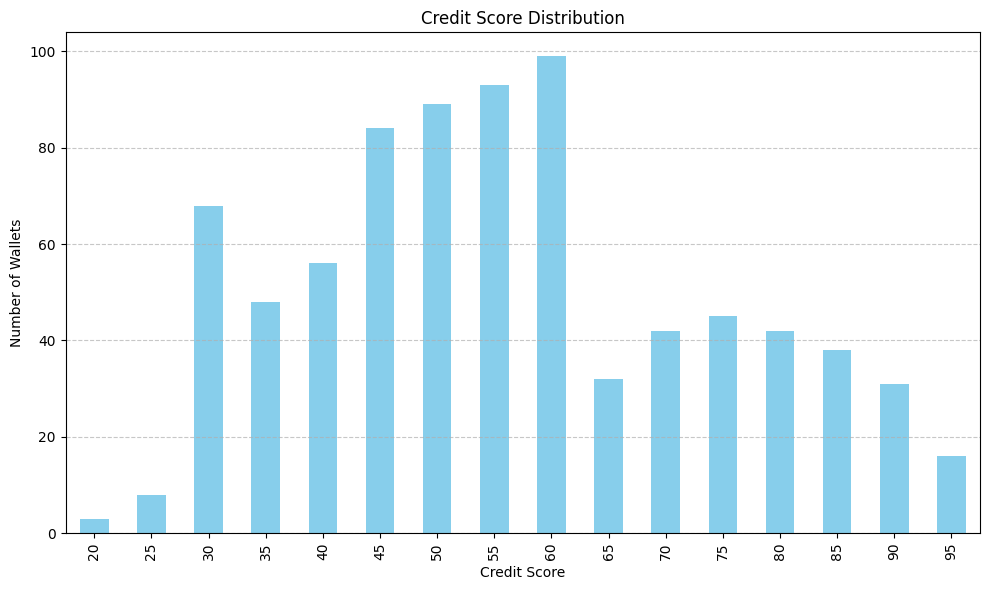

In [33]:
score_counts = credit_features.groupby('credit_score').size()

score_counts.sort_index().plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Number of Wallets')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
num_col = credit_features.drop(['account_id'], axis =1 )

In [35]:
num_col = num_col.drop('days_since_last_activity', axis = 1)


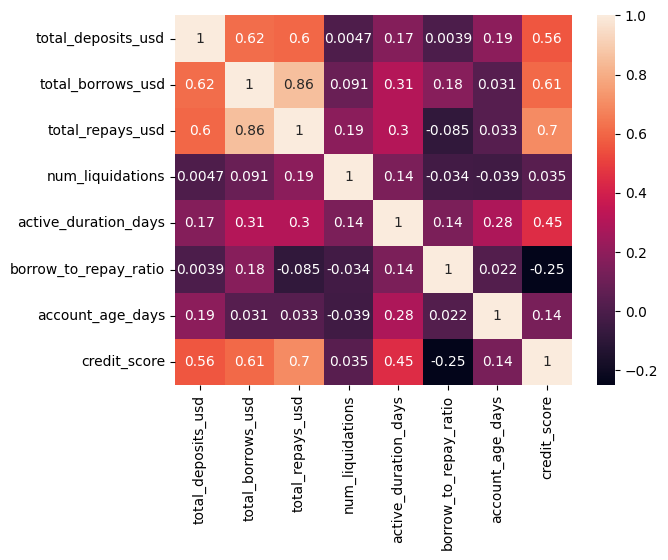

In [36]:
sns.heatmap(num_col.corr(), annot = True)
plt.show()

In [37]:
X = credit_features.drop(['credit_score', 'account_id', 'days_since_last_activity'], axis =1)
y = credit_features['credit_score']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Predicted Values:", y_pred)

Mean Squared Error: 4.6375786163522
Predicted Values: [88.2  59.7  59.55 60.   84.1  63.75 60.   34.5  45.05 35.75 55.   55.55
 45.   30.   60.05 84.7  50.9  79.5  84.45 30.   38.15 55.25 59.8  89.2
 45.2  46.25 55.   60.   45.1  49.85 55.   89.45 39.3  72.35 60.   30.
 74.85 60.   45.   49.9  70.9  72.3  30.   25.1  30.   59.95 25.45 30.
 60.05 69.9  70.3  62.5  94.9  40.   49.2  71.45 45.   60.   75.2  65.15
 63.05 30.   79.1  69.3  55.8  78.9  50.   59.95 65.   39.2  30.   60.05
 60.   30.   30.   79.35 45.3  62.85 84.55 84.8  77.65 50.   94.95 74.45
 34.65 49.95 55.1  80.2  75.   64.7  55.   60.   30.1  60.05 30.   35.05
 41.5  94.75 45.75 30.   50.   47.2  54.55 45.   94.25 39.   54.4  70.3
 89.55 79.15 60.   30.   69.3  30.   84.9  55.   63.15 79.65 63.6  75.65
 35.4  64.5  30.   45.4  90.   45.   55.   47.1  54.6  44.85 30.   41.45
 59.55 50.   44.9  44.95 84.25 61.3  95.   49.95 30.   45.   54.9  50.05
 50.7  40.55 85.9  63.2  69.55 40.   45.45 84.7  69.3  68.75 60.05 30.
 59.7

In [47]:
r2 = r2_score(y_test, y_pred)
r2

0.9864402175484454

In [49]:
model.score(X_train, y_train) 

0.9964003215938929

In [50]:
model.score(X_test, y_test)

0.9864402175484454

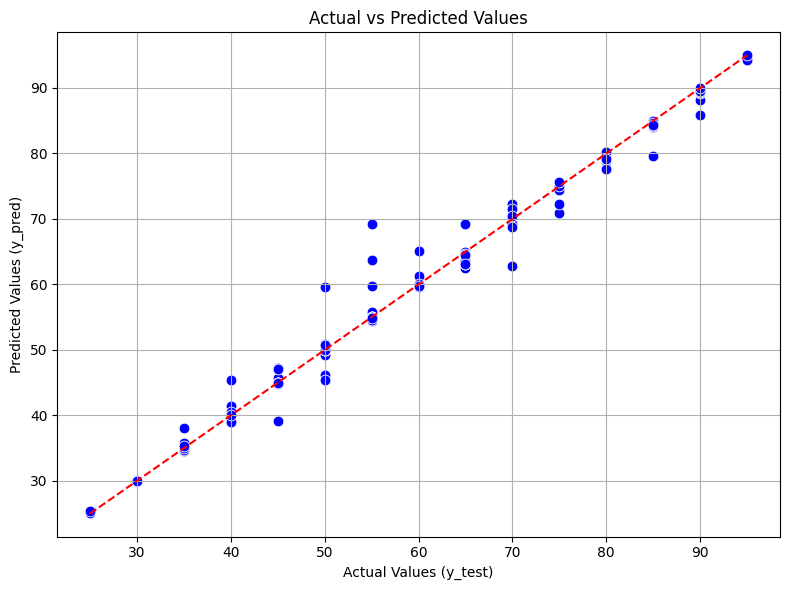

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=60)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')  \

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
top_wallets = credit_features.sort_values(by='credit_score', ascending=False).head(1000)
top_wallets[['account_id', 'credit_score']].to_csv('top_1000_wallets.csv', index=False)

In [53]:
top_wallets

,account_id,total_deposits_usd,total_borrows_usd,total_repays_usd,num_liquidations,active_duration_days,borrow_to_repay_ratio,days_since_last_activity,account_age_days,credit_score
5302,0xff5269e8ae6a9f2ff2a93c770fd35f8ce71712f8,90830.58,23979.34,25343.42,0.0,228,0.0,1944,2172,95
2284,0x6efd5dbb3e3c96c4c8bc7376aae263d1c0e7f532,17804.77,6990.50,7402.51,0.0,177,0.0,1967,2144,95
481,0x1712808a5d99e8fa244079d50e2a3c46afcafb35,30005.56,39217.00,39648.82,0.0,165,0.0,1954,2120,95
3341,0xa1872b9b494556777d2b3ac5e699cf7fb377bafc,46782.21,18622.32,19025.31,0.0,168,0.0,2002,2171,95
4496,0xd7925984736824b4aecf8301c9aee211cd976494,29012.58,18815.42,19504.25,0.0,184,0.0,1990,2175,95
...,...,...,...,...,...,...,...,...,...,...
2815,0x89c15e1e3c53dd550c7ca64091d31db92bb94aa0,112.06,72.10,18.00,0.0,104,4.0,2028,2133,25
3951,0xbf708ce00c8825ae23ce0d712cebdb7621d670cb,45.80,22.00,3.09,0.0,72,7.0,2086,2159,25
2554,0x7d3ff21df6e555c6f2accc0c437f9e31fffdb6c4,9.42,37.53,10.31,0.0,5,3.0,2105,2111,20
3814,0xb8b73911df9ad550db0a25267a31242a388ae8ea,0.96,0.47,0.10,0.0,3,4.0,2156,2159,20


In [54]:
top_5_wallets = credit_features.sort_values(by='credit_score', ascending=False).head(5)


bottom_5_wallets = credit_features.sort_values(by='credit_score', ascending=True).head(5)

In [55]:
top_5_wallets

,account_id,total_deposits_usd,total_borrows_usd,total_repays_usd,num_liquidations,active_duration_days,borrow_to_repay_ratio,days_since_last_activity,account_age_days,credit_score
5302,0xff5269e8ae6a9f2ff2a93c770fd35f8ce71712f8,90830.58,23979.34,25343.42,0.0,228,0.0,1944,2172,95
2284,0x6efd5dbb3e3c96c4c8bc7376aae263d1c0e7f532,17804.77,6990.50,7402.51,0.0,177,0.0,1967,2144,95
481,0x1712808a5d99e8fa244079d50e2a3c46afcafb35,30005.56,39217.00,39648.82,0.0,165,0.0,1954,2120,95
3341,0xa1872b9b494556777d2b3ac5e699cf7fb377bafc,46782.21,18622.32,19025.31,0.0,168,0.0,2002,2171,95
4496,0xd7925984736824b4aecf8301c9aee211cd976494,29012.58,18815.42,19504.25,0.0,184,0.0,1990,2175,95


In [56]:
bottom_5_wallets

,account_id,total_deposits_usd,total_borrows_usd,total_repays_usd,num_liquidations,active_duration_days,borrow_to_repay_ratio,days_since_last_activity,account_age_days,credit_score
3814,0xb8b73911df9ad550db0a25267a31242a388ae8ea,0.96,0.47,0.10,0.0,3,4.0,2156,2159,20
1240,0x3aea1b278b638b8517bbb14b1366abac7f3cd90a,2.91,2.05,0.30,0.0,0,6.0,2131,2132,20
2554,0x7d3ff21df6e555c6f2accc0c437f9e31fffdb6c4,9.42,37.53,10.31,0.0,5,3.0,2105,2111,20
3863,0xbb3515f753b0172fe464f2c4d7193840c08b77c7,8.95,5.75,1.52,0.0,132,3.0,2025,2158,25
2688,0x8376b14104dbf0642a3c2adfa33793cfcb0b8d76,13.11,13.80,4.18,0.0,106,3.0,2067,2174,25
